In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import pickle

In [6]:
column_name = ["snoring rate", "respiration rate", "body temperature", "limb movement", "body oxygen", 
               "eye moment", "sleeping hours", "heart rate", "stress level"]

In [15]:
data = pd.read_csv("data/data.csv", names = column_name, skiprows= 1)

In [16]:
data.head()

,snoring rate,respiration rate,body temperature,limb movement,body oxygen,eye moment,sleeping hours,heart rate,stress level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [17]:
data.isnull().sum()

snoring rate        0
respiration rate    0
body temperature    0
limb movement       0
body oxygen         0
eye moment          0
sleeping hours      0
heart rate          0
stress level        0
dtype: int64

In [18]:
data.shape

(630, 9)

<AxesSubplot:ylabel='Density'>

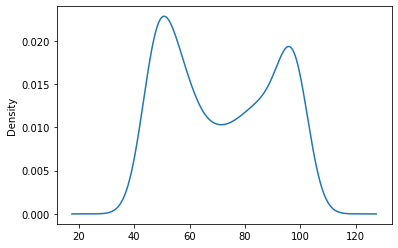

In [24]:
data["snoring rate"].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

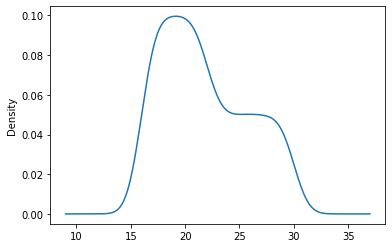

In [25]:
data["respiration rate"].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

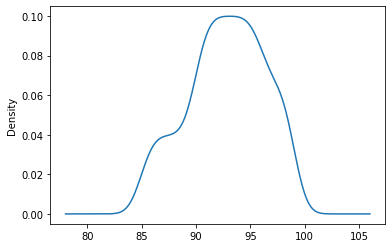

In [26]:
data["body temperature"].plot(kind='kde')

In [46]:
data["stress level"].value_counts()

3    126
1    126
0    126
2    126
4    126
Name: stress level, dtype: int64

In [37]:
x = data.drop("stress level", axis=1)
y = data["stress level"]

In [38]:
x.shape, y.shape

((630, 8), (630,))

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [40]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((567, 8), (63, 8), (567,), (63,))

In [49]:
model = DecisionTreeClassifier(random_state=0)

In [50]:
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [51]:
y_pred = model.predict(x_test)

In [53]:
confusion_matrix = confusion_matrix(y_test, y_pred)

In [54]:
print(confusion_matrix)

[[16  0  0  0  0]
 [ 0  9  1  0  0]
 [ 0  0 14  0  0]
 [ 0  0  0 13  1]
 [ 0  0  0  0  9]]


In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.90      0.95        10
           2       0.93      1.00      0.97        14
           3       1.00      0.93      0.96        14
           4       0.90      1.00      0.95         9

    accuracy                           0.97        63
   macro avg       0.97      0.97      0.96        63
weighted avg       0.97      0.97      0.97        63



In [59]:
output = open('model/decision_tree_model.pkl', 'wb')
pickle.dump(model, output)
output.close()

In [61]:
x_test.head()

,snoring rate,respiration rate,body temperature,limb movement,body oxygen,eye moment,sleeping hours,heart rate
497,49.16,17.664,98.496,7.328,96.664,76.64,8.664,54.16
244,80.96,22.256,90.128,12.320,88.128,95.32,0.128,65.64
552,64.80,20.480,92.480,10.480,90.480,87.40,2.720,61.20
213,48.72,17.488,98.232,6.976,96.488,74.88,8.488,53.72
549,82.64,22.704,90.352,12.880,88.352,95.88,0.352,66.76


In [62]:
y_test

497    0
244    3
552    2
213    0
549    3
      ..
211    3
30     0
584    3
494    3
341    0
Name: stress level, Length: 63, dtype: int64